<a href="https://colab.research.google.com/github/NeZorinEgor/Computer-vision/blob/main/Frequency%20Dictionary/frequencyDictionary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Всего символов: 400
{'D': 31, 'X': 23, '/': 35, '*': 41, '1': 40, 'A': 35, 'P': 37, '8': 33, '-': 31, 'B': 38, 'W': 26, '0': 30}
Процент определения символов: 100.0


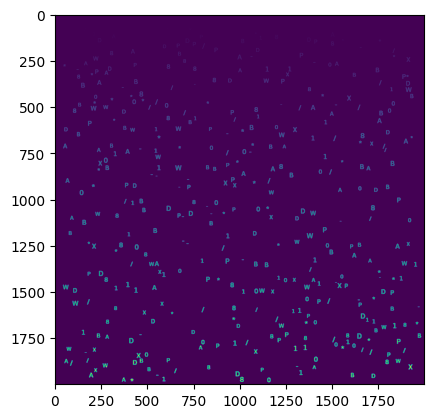

In [6]:
from matplotlib import pyplot as plt
from skimage.measure import regionprops, label
from skimage.morphology import binary_closing


def filling_factor(region):
    return region.image.mean()


def recognize(region):
    if filling_factor(region) == 1:
        return '-'
    else:
        match(region.euler_number):
            case -1:
                if 1 in region.image.mean(0)[:2]:
                    return 'B'
                return '8'

            case 0: #A || 0 || P || D || * with hole
                buf_region_image = region.image.copy()

                if 1 in region.image.mean(0)[:2]:
                    buf_region_image[-1, :] = 1
                    buf_region_image[:, -len(buf_region_image[0])//2:] = 1
                    buf_labeled = label(buf_region_image)
                    buf_regions = regionprops(buf_labeled)
                    euler = buf_regions[0].euler_number
                    if euler == 0:
                        return 'D'
                    elif euler == -1:
                        return 'P'

                buf_region_image[-1, :] = 1
                buf_labeled = label(buf_region_image)
                buf_regions = regionprops(buf_labeled)
                if 1 in region.image.mean(1):
                    return '*'
                if buf_regions[0].euler_number == -1:
                    return 'A'

                return '0'

            case 1:
                if ''.join(map(str, [1.,1.])) in ''.join(map(str, region.image.mean(0))):
                    return '1'
                buf_region_image = region.image.copy()
                buf_region_image[[0,-1], :] = 1
                buf_labeled = label(buf_region_image)
                buf_regions = regionprops(buf_labeled)
                euler = buf_regions[0].euler_number
                if euler == -1:
                    return 'X'
                elif euler == -2:
                    return 'W'
                elif region.eccentricity > 0.5:
                    return '/'
                return '*'

            case _:
                return '?'


data = plt.imread("symbols.png")
bin = data.mean(2)
bin[bin > 0] = 1
labelled = label(bin)
count_chars = labelled.max()
print(f"Всего символов: {count_chars}")
regions = regionprops(labelled)
counts = {}
for region in regions:
    symbol = recognize(region)
    if symbol not in counts:
        counts[symbol] = 0
    counts[symbol] += 1
print(counts)
print(f"Процент определения символов: {(count_chars - counts.get('?', 0)) / count_chars * 100}")
plt.imshow(labelled)
plt.show()